# Task for session2_cont and session3: 
## Edge-Preserving Denoising Filters & Feature Matching

**Instructions:**  
**please dont use .py to solve this task, just use tasks2.ipynb and edit the cells.**
- After forking the [SkyXperts-Vision-Course repo](https://github.com/ffathy-tdx/SkyXperts-Vision-Course) on GitHub. (you should have already dont this in the last session & uploaded task1)
- Go to your fork of the repo on GitHub.
- At the top, look for a yellow box that says “This branch is X commits behind…”
- Click the Sync fork or Update branch button.
The new task will show up in your tasks/ folder.  
- Upload your task to your forked repo (like you've done with task1 before)
---

## 1. DoG, LoG, and Edge-Preserving Denoising Filters

**Task:**
- Briefly read the descriptions below, then apply each filter to `'sample.jpg'` (or any test image you choose).
- Compare the results visually and write your observations.

**Background:**
- **DoG (Difference of Gaussian):** Used for edge detection by subtracting two blurred versions of the image (with different Gaussian sigmas).
- **LoG (Laplacian of Gaussian):** Uses a single Gaussian blur followed by Laplacian to highlight regions of rapid intensity change (edges).
- **Edge-Preserving Denoising (Bilateral Filter):** Smooths image while preserving edges (unlike simple Gaussian blur). You've already used this at the end of task1.

---

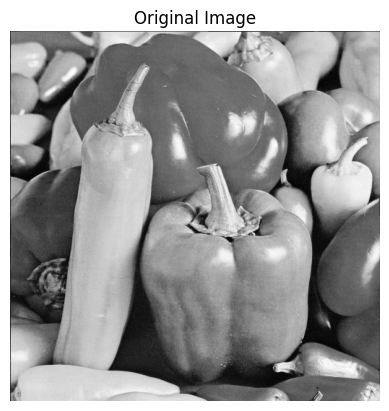

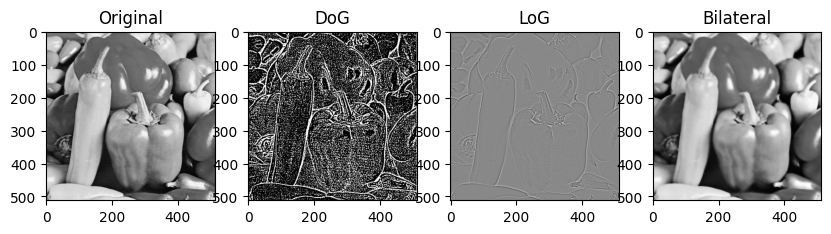

In [1]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('img.tiff', 0)  # Use grayscale for filtering
plt.imshow(img, cmap='gray');
plt.axis('off'); 
plt.title('Original Image'); 
plt.show()

# TODO: Apply DoG
blur1 = cv2.GaussianBlur(img, (5, 5), 1)
blur2 = cv2.GaussianBlur(img, (5, 5), 2)
dog = blur1 - blur2

# TODO: Apply LoG
blur = cv2.GaussianBlur(img, (5, 5), 1) #smoothing
log = cv2.Laplacian(blur, cv2.CV_64F) #LoG

# TODO: Apply bilateral (edge-preserving) filter
bilateral = cv2.bilateralFilter(img, 9, 75, 75)

# TODO: Apply Canny edge detector
edges = cv2.Canny(img, 100, 200)

# Show all results for comparison
plt.figure(figsize=(10, 4))
plt.subplot(1, 4, 1); 
plt.imshow(img, cmap='gray'); 
plt.title('Original')
plt.subplot(1, 4, 2); 
plt.imshow(dog, cmap='gray'); 
plt.title('DoG')
plt.subplot(1, 4, 3); 
plt.imshow(log, cmap='gray'); 
plt.title('LoG')
plt.subplot(1, 4, 4); 
plt.imshow(bilateral, cmap='gray'); 
plt.title('Bilateral')
plt.show()





 What differences do you observe between DoG, LoG, and the edge-preserving filter?**Q1:**
DoG creates a high contrast image , showing where intensity changes occur in the image, image has a very processed appearance
LoG creates an image with lower constrast that only highlights edges
Edge preserving filter preserves the edges while blurring the image , producing a realistic image 

## 2. Keypoints & Descriptors: SIFT vs. ORB

**Task:**
- Detect and plot keypoints on `'sample.jpg'` using SIFT and ORB.
- Compare the number and distribution of detected keypoints.

**Background:**
- **Keypoints:** Distinctive image points (corners/blobs) useful for matching.
- **Descriptors:** Vectors that describe local patches around keypoints for comparison/matching.

---

Number of SIFT keypoints: 720
Number of ORB keypoints: 500


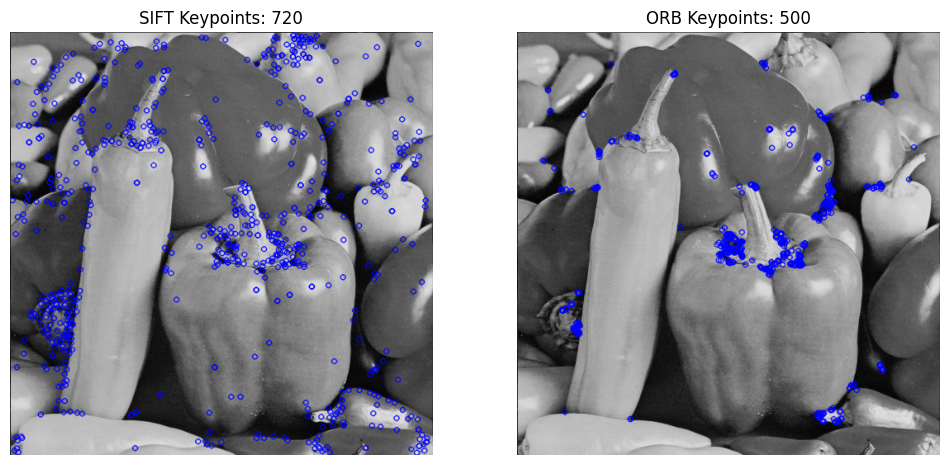

In [9]:
# Detect and plot SIFT keypoints
sift = cv2.SIFT_create()
sift_keypoints, descriptors = sift.detectAndCompute(img.astype(np.uint8), None)


# Detect and plot ORB keypoints
orb = cv2.ORB_create()
orb_keypoints = orb.detect(img)


# TODO: Count and compare number of keypoints for SIFT and ORB
num_sift = len(sift_keypoints)
num_orb = len(orb_keypoints)
print(f"Number of SIFT keypoints: {num_sift}")
print(f"Number of ORB keypoints: {num_orb}")

sift_img = cv2.drawKeypoints(img, sift_keypoints, None, color=(255, 0, 0), flags=0)
orb_img = cv2.drawKeypoints(img, orb_keypoints, None, color=(255, 0, 0), flags=0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sift_img, cv2.COLOR_BGR2RGB))
plt.title(f"SIFT Keypoints: {num_sift}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(orb_img, cv2.COLOR_BGR2RGB))
plt.title(f"ORB Keypoints: {num_orb}")
plt.axis("off")

plt.show()

**Q2: How do the number and distribution of keypoints differ between SIFT and ORB?**

_Write your answer here._
SIFT generates a larger number of keypoints with a higher keypoints density
ORB generates a smaller number of keypoints and is designed for speed


## 3. Feature Matching with Descriptors

**Task:**
- Load a second image (e.g., `'sample2.jpg'`).
- Detect keypoints/descriptors using SIFT or ORB in both images.
- Match the features between the images using BFMatcher or FLANN.
- Plot the top matches.

**Background:**
- **Feature matching** helps recognize objects/scenes or estimate image transformations.

---

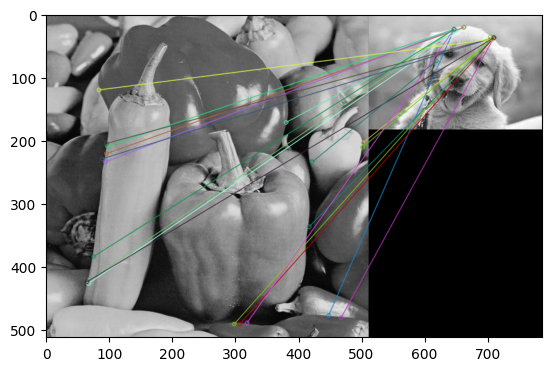

In [13]:
# Load second image
img2 = cv2.imread('dog.jpg', 0)

# Detect SIFT keypoints/descriptors in both images
sift = cv2.SIFT_create()
sift_keypoints, descriptors = sift.detectAndCompute(img.astype(np.uint8), None)

sift_keypoints2, descriptors2 = sift.detectAndCompute(img2.astype(np.uint8), None)

# BFMatcher with default params
matcher = cv2.BFMatcher()
matches = matcher.match(descriptors, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches

img_matches = cv2.drawMatches(img, sift_keypoints, img2, sift_keypoints2,matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img_matches)
plt.show()



# bonus TODO: Try with ORB or FLANN if you like

**Q3: What do you notice about the feature matches? Are there any mismatches or errors? How might you improve the matching process?**

_Write your answer here._
There's a lot of mismatches ,which can be improved by enabling cross-checking and applying ratio test with kNN matching to filter out ambiguous matches.

**Bonus Task (Optional, for extra credit):**
- Try using different image preprocessing steps *before* edge detection or feature extraction.
    - For example:
        - Add noise to your image (e.g., Gaussian noise, salt-and-pepper noise).
        - Apply a sharpening filter to your image.
    - Then, run DoG, LoG, or any edge-preserving filter and observe the changes.
- **What to do:**
    - Show the results (images/plots) for at least one type of preprocessing + edge detection.
    - Briefly explain:
        - How does noise affect edge maps or keypoints?
        - Does sharpening make features easier or harder to detect/match?

**You can add your code and observations in the cells below.**


In [ ]:
# Write your code here

_What are your observations?_
write them here

## 4. Reflection (Optional)

- What was the most challenging or interesting part of this task for you?
- Any feedback or thoughts?

_Write your reflection here._